#Implementation of word2vec using tensorflow

In [12]:
#This example demonstrates the Skip-gram model.
import tensorflow as tf
import numpy as np

# Define a small dataset for demonstration
corpus = ["the", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]

# Create a word-to-index mapping
word2idx = {word: idx for idx, word in enumerate(set(corpus))}
idx2word = {idx: word for word, idx in word2idx.items()}

print(f'word2idx: {word2idx}')
print(f'idx2word: {idx2word}')

word2idx: {'quick': 0, 'brown': 1, 'dog': 2, 'the': 3, 'over': 4, 'fox': 5, 'lazy': 6, 'jumps': 7}
idx2word: {0: 'quick', 1: 'brown', 2: 'dog', 3: 'the', 4: 'over', 5: 'fox', 6: 'lazy', 7: 'jumps'}


Word: quick, Vector: [ 0.1038103   0.08188854  0.07301189  0.12893821 -0.12812498 -0.10686094
  0.10950125 -0.13770348  0.06692676 -0.08160098]
Word: brown, Vector: [ 0.12394582  0.12519571  0.08942689  0.16158462 -0.14106205 -0.08864271
  0.11471044 -0.09719333  0.07159896 -0.15904982]
Word: dog, Vector: [ 0.12777905  0.10692134  0.16092345  0.1571104  -0.16407911 -0.07817268
  0.1348986  -0.11899807  0.09430076 -0.17066401]
Word: the, Vector: [ 0.14531855  0.08441565  0.11240476  0.09257264 -0.06779292 -0.10802189
  0.09629569 -0.12050254  0.06204739 -0.17807162]
Word: over, Vector: [ 0.06439625  0.0612325   0.16529272  0.15739574 -0.08229392 -0.09792413
  0.07695548 -0.12553316  0.11943538 -0.14606163]
Word: fox, Vector: [ 0.13163033  0.05289771  0.08358811  0.09274133 -0.08619329 -0.12479562
  0.12568517 -0.06067845  0.05462819 -0.079868  ]
Word: lazy, Vector: [ 0.10107131  0.07225309  0.06821815  0.10448104 -0.14178738 -0.10397606
  0.06908491 -0.10649455  0.08700607 -0.17266253]


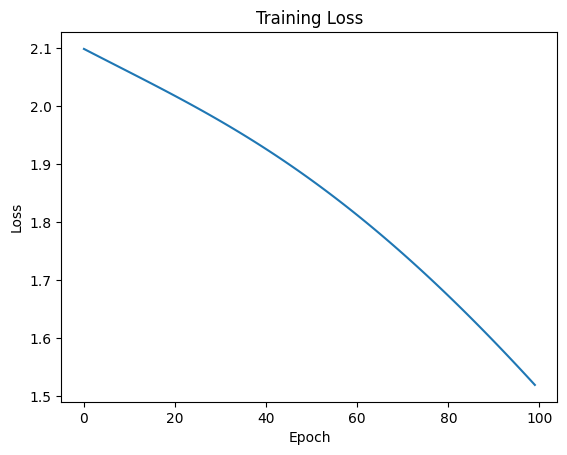

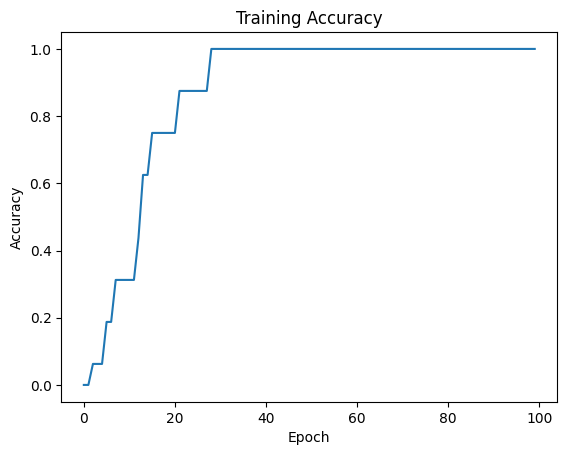

In [2]:
import tensorflow as tf
import numpy as np

# Define a small dataset for demonstration
corpus = ["the", "quick", "brown", "fox", "jumps", "over", "the", "lazy", "dog"]

# Create a word-to-index mapping
word2idx = {word: idx for idx, word in enumerate(set(corpus))}
idx2word = {idx: word for word, idx in word2idx.items()}
vocab_size = len(word2idx)

# Generate skip-grams from the dataset
skipgrams = []
for center_idx, target_word in enumerate(corpus):
    context = [corpus[idx] for idx in range(max(0, center_idx - 1), min(len(corpus), center_idx + 2)) if idx != center_idx]
    for context_word in context:
        skipgrams.append((word2idx[target_word], word2idx[context_word]))

# Build the Word2Vec model
embedding_dim = 10
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=1),
    tf.keras.layers.Dense(vocab_size, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the Word2Vec model
target_words = np.array([pair[0] for pair in skipgrams], dtype=np.int32)
context_words = np.array([pair[1] for pair in skipgrams], dtype=np.int32)
labels = np.zeros_like(target_words)

history = model.fit(target_words, labels, epochs=100, verbose=0)

# Get the learned word vectors
word_vectors = model.layers[0].get_weights()[0]

# Print the learned word vectors
for word, idx in word2idx.items():
    print(f"Word: {word}, Vector: {word_vectors[idx]}")

# Print loss and accuracy curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

plt.plot(history.history['accuracy'])
plt.title('Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


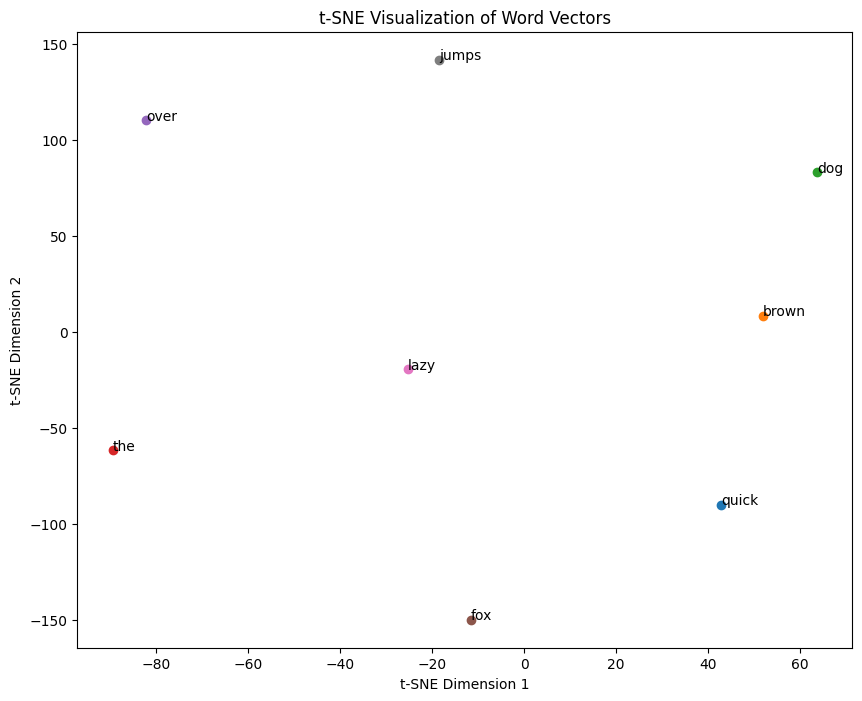

In [19]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Get the learned word vectors
word_vectors = model.layers[0].get_weights()[0]

# Apply t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, perplexity=5, random_state=42)
word_vectors_tsne = tsne.fit_transform(word_vectors)

# Plot the word vectors
plt.figure(figsize=(10, 8))
for word, idx in word2idx.items():
    plt.scatter(word_vectors_tsne[idx, 0], word_vectors_tsne[idx, 1])
    plt.text(word_vectors_tsne[idx, 0], word_vectors_tsne[idx, 1], word)

plt.title('t-SNE Visualization of Word Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()